#Colour Palette

Colours are beautiful! This notebook shows you how you can create a colour palette from nice pictures found on the net. 
Let's get started by loading some useful libraries and some random pictures:

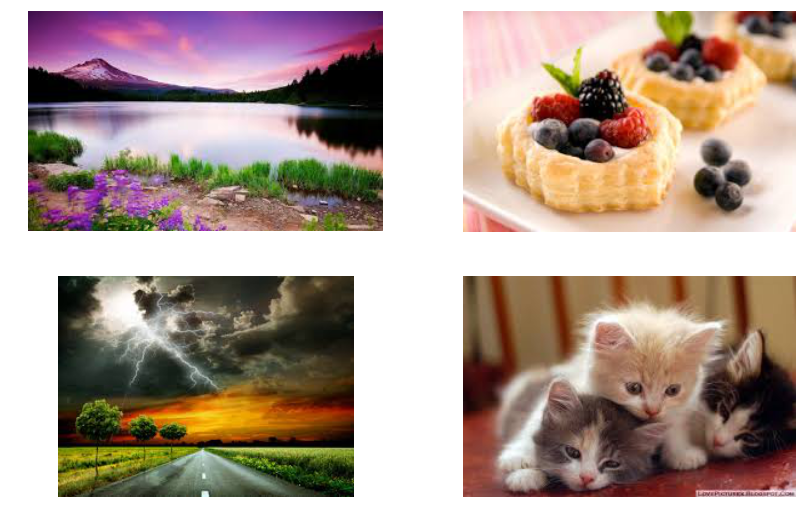

In [1]:
%matplotlib inline

from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster

# load images
im1 = Image.open('img/im1.jpg')
im2 = Image.open('img/im2.jpg')
im3 = Image.open('img/im3.jpg')
im4 = Image.open('img/im4.jpg')

# show images
f = plt.figure(figsize=(12,9))
p1 = f.add_subplot(221)
plt.imshow(im1)
plt.axis('off')
p2 = f.add_subplot(222)
plt.imshow(im2)
plt.axis('off')
p3 = f.add_subplot(223)
plt.imshow(im3)
plt.axis('off')
p4 = f.add_subplot(224)
plt.imshow(im4)
plt.axis('off')
plt.subplots_adjust(left=.05,right=.95,bottom=.05,top=.8,wspace=.2,hspace=.2)

Let's say we're interested in the top 5 dominant colours. We'll run a simple [clustering algorithm](https://en.wikipedia.org/wiki/K-means_clustering) to find the colours that best represent the colours that we observe in each respective picture.

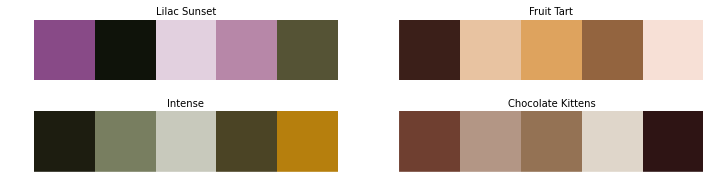

In [2]:
k = 5
im = [im1,im2,im3,im4]
titles = ['Lilac Sunset','Fruit Tart','Intense','Chocolate Kittens']
f = plt.figure(figsize=(12,3))
for idx in range(4):
    i = im[idx]
    ar = np.asarray(i, dtype='float32')
    ar = ar.reshape((np.prod(ar.shape[:2]),ar.shape[2]))
    codes, dist = scipy.cluster.vq.kmeans(ar,k)
    p = f.add_subplot(2,2,idx+1)
    p.set_title(titles[idx], fontsize=10)
    plt.imshow(codes.reshape((1,k,3))/255.,interpolation='none')
    plt.axis('off')

The clustered colour palettes are really fun, and give an interesting decomposition of the original pictures.
Lilac Sunset does reflect the 'purplish' tones of the picture, Intense has a nice jarring bolt of gold contrasted against the monochrome, while chocolate kittens literally painted out the key chocolate tones! However one problem with our clustering algorithm is that it leaves out certain small regions of eye-catching colours, due to the small proportion of the picture that possess that colour. Case in point: Fruit Tart.

To get the smaller regions of colours in one's palette, we could increase the number of clusters `k` and then prune away similar colours, or initialize the clustering algorithm with a set of colours that we think might suit the picture.

Hope you enjoyed this little exposition! :)